<a href="https://colab.research.google.com/github/Karimi-Gichunge/Ad_EDA_R/blob/main/Independent_project_week_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advertising EDA

## 1. Defining the Question

### a) Specifying the Data Analytic Question

 Identify which individuals are most likely to click on ads from a  cryptography course website 

### b) Defining the Metric for Success

For this sttudy, we will perform conclusive Exploratory Data Analysis to enable us identify individuals who are most likely to click on ads.

### c) Understanding the context 

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. Using the data previously collected, she is looking to do a study to identify which individuals are most likely to click on her ads.



### d) Data Relevance

Data is provided was collected in the past but from the same blog hence it is very suitable for this study.

**Definition of Variables** 
Daily Time Spent on Site

Age	

Area

Income

Daily Internet Usage

Ad Topic Line	

City	

Male	

Country	

Timestamp	

Clicked on Ad

## 2. Importing Libraries/ Reading Data

In [ ]:
library(tidyverse)

In [ ]:
#Loading data
ad <- read.csv("advertising.csv", na.strings = "")
#Reading head 5
head(ad)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


## 3. Checking  Data

In [ ]:
#Data Dimensions
paste("The dimensions of the data frame are ", paste (dim(ad), collapse = ','))

[1] "The dimensions of the data frame are  1000,10"

In [ ]:
#Datatypes
sapply(ad, class)

#We have a mix of datatypes from numeric, integer and character

Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
               "numeric"              "character"              "character" 
                    Male                  Country                Timestamp 
               "integer"              "character"              "character" 
           Clicked.on.Ad 
               "integer"

In [ ]:
#Summary
summary(ad)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad.Topic.Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

In [ ]:
#Checking for unique characters
sapply(ad, function(x) length(unique(x)))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                     900                       43                     1000 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                     966                     1000                      969 
                    Male                  Country                Timestamp 
                       2                      237                     1000 
           Clicked.on.Ad 
                       2

## 4. Tidying the data

In [ ]:
#Checking for duplicate rows
duplicated_rows <- ad[duplicated(ad),]
duplicated_rows

#There is a duplication of column names

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>


In [ ]:
#Selecting only the items without duplicates
ad_df <- ad[!duplicated(ad), ]
dim(ad_df)

[1] 1000   10

In [ ]:
#Checking for missing values
colSums(is.na(ad_df))

#We have no missing values

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

In [ ]:
head(ad_df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
#Checking for outliers
#First we select numeric columns excluding male and clicked.on.ad since they are binary column

df <- subset(ad_df, select = -c(Ad.Topic.Line,City,	Male,	Country,	Timestamp,	Clicked.on.Ad))
head(df)


,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage
,<dbl>,<int>,<dbl>,<dbl>
1,68.95,35,61833.90,256.09
2,80.23,31,68441.85,193.77
3,69.47,26,59785.94,236.50
4,74.15,29,54806.18,245.89
5,68.37,35,73889.99,225.58
6,59.99,23,59761.56,226.74


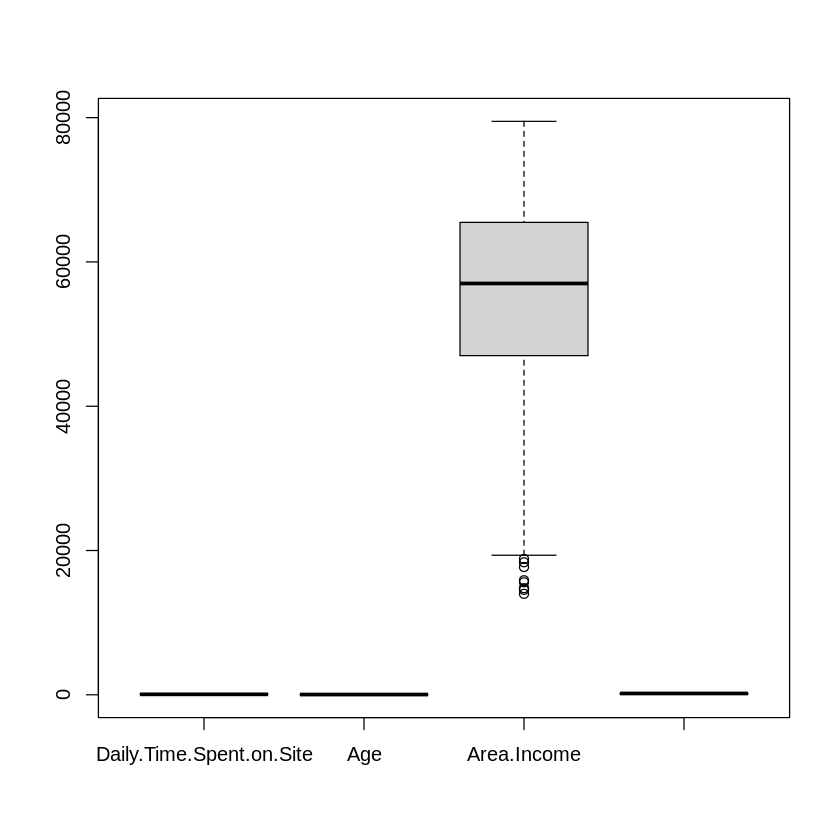

In [ ]:
#Plotting boxplots to check for outliers
boxplot(df)

#Our Area.Income column have a few outliers of people earning less than 20000
#We check them out to see whether they are legit

In [ ]:
library(magrittr)

In [ ]:
#Looking at the outliers
outliers <- ad_df %>% dplyr::filter(Area.Income < 20000)
outliers

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
49.89,39,17709.98,160.03,Enhanced system-worthy application,East Michele,1,Belize,2016-04-16 12:09:25,1
63.88,38,19991.72,136.85,Upgradable even-keeled hardware,Kristintown,0,Madagascar,2016-02-29 23:56:06,1
48.09,33,19345.36,180.42,Balanced motivating help-desk,West Travismouth,0,Heard Island and McDonald Islands,2016-05-28 12:38:37,1
57.86,30,18819.34,166.86,Horizontal modular success,Estesfurt,0,Algeria,2016-07-08 17:14:01,1
64.63,45,15598.29,158.80,Triple-buffered high-level Internet solution,Isaacborough,1,Azerbaijan,2016-06-12 03:11:04,1
58.05,32,15879.10,195.54,Total asynchronous architecture,Sanderstown,1,Tajikistan,2016-02-12 10:39:10,1
66.26,47,14548.06,179.04,Optional full-range projection,Matthewtown,1,Lebanon,2016-04-25 19:31:39,1
68.58,41,13996.50,171.54,Exclusive discrete firmware,New Williamville,1,El Salvador,2016-07-06 12:04:29,1
52.67,44,14775.50,191.26,Persevering 5thgeneration knowledge user,New Hollyberg,0,Jersey,2016-05-19 06:37:38,1


We won't remove the above figures because it concerns income and people earn different amounts of money. Also, it is not defined whether the figures are in shillings, dollars, euros etc. Also, the we don't knw if they are annual incomes, monthly or even weekly. For that matter, we will leave them

In [ ]:
#Change datattypes
ad_df$Male <- as.factor(ad_df$Male)
ad_df$Clicked.on.Ad <- as.factor(ad_df$Clicked.on.Ad)
#Checking datatypes
sapply(ad_df, class)

Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
               "numeric"              "character"              "character" 
                    Male                  Country                Timestamp 
                "factor"              "character"              "character" 
           Clicked.on.Ad 
                "factor"

In [ ]:
#Changing column timestamp to datetime
ad_df$Timestamp <- as.POSIXct(ad_df$Timestamp, "%Y-%m-%d %H:%M:%S",tz = "GMT")
head(ad_df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>,<dttm>,<fct>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
#Splitting time and date from Timestamp
ad_df$date = format(ad_df$Timestamp, "%y/%m/%d")
ad_df$time = format(ad_df$Timestamp, "%H:%M:%S")
ad_df$date <- as.Date(ad_df$date)
head(ad_df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad,date,time
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>,<dttm>,<fct>,<date>,<chr>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,16-03-27,00:53:11
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,16-04-04,01:39:02
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,16-03-13,20:35:42
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,16-01-10,02:31:19
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,16-06-03,03:36:18
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,16-05-19,14:30:17


In [ ]:
#Dropping the column Timestamp
final = subset(ad_df, select = -c(Timestamp))
head(final)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Clicked.on.Ad,date,time
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>,<fct>,<date>,<chr>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,16-03-27,00:53:11
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,16-04-04,01:39:02
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,16-03-13,20:35:42
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,16-01-10,02:31:19
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,16-06-03,03:36:18
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,0,16-05-19,14:30:17


## 5. Exploratory Data Analysis




### i. Univariate Analysis

**Measures of Central Tendency**

In [ ]:
#Selecting the numeric columns
num <- subset(final, select = -c(Ad.Topic.Line,City,	Male,	Country,	date,	Clicked.on.Ad, time))
#Getting the measures of central tendency 
summary(num)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       

In [92]:
var(final$Age)
sd(final$age)

[1] 77.18611

[1] NA

**Conclusions**



1.  The minimum amount of time spent on the blog is 32.60 and maximum is 91.43 with a mean at 65 and median at 68
2.   The mean age of people visiting the site is 36, max age is 61 and min age is 19 which makes sense since the range between 61 and 19 are the people most active online.
3. From data, the maximum income of individuals is 79485 and a min income of 13996
4. The mean daily internet usage on the website is 180 and a median level at 183.1



**Distribution of data**

In [104]:
install.packages("moments")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [105]:
library(moments)

In [112]:
head(num)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage
,<dbl>,<int>,<dbl>,<dbl>
1,68.95,35,61833.90,256.09
2,80.23,31,68441.85,193.77
3,69.47,26,59785.94,236.50
4,74.15,29,54806.18,245.89
5,68.37,35,73889.99,225.58
6,59.99,23,59761.56,226.74


In [113]:
#Checking for skewness
paste("Daily Time_Spent_Skewness: ", paste (skewness(final$Daily.Time.Spent.on.Site), collapse = ',')) 
paste("Income_Skewness: ", paste (skewness(final$Area.Income), collapse = ',')) 
paste("Age_Skewness: ", paste (skewness(final$Age), collapse = ',')) 
paste("Daily_Internet_Usage_Skewness: ", paste (skewness(final$Daily.Internet.Usage), collapse = ',')) 
  
# Histogram of distribution 
#hist(x) 

[1] "Daily Time_Spent_Skewness:  -0.371202614867441"

[1] "Income_Skewness:  -0.649396701694076"

[1] "Age_Skewness:  0.478422676206608"

[1] "Daily_Internet_Usage_Skewness:  -0.0334870316434409"

In [114]:
#Checking for kurtosis
paste("Daily Time_Spent_Kurtosis: ", paste (kurtosis(final$Daily.Time.Spent.on.Site), collapse = ',')) 
paste("Income_Kurtosis: ", paste (kurtosis(final$Area.Income), collapse = ',')) 
paste("Age_Kurtosis: ", paste (kurtosis(final$Age), collapse = ',')) 
paste("Daily_Internet_Usage_Kurtosis: ", paste (kurtosis(final$Daily.Internet.Usage), collapse = ',')) 
  

[1] "Daily Time_Spent_Kurtosis:  1.90394215401081"

[1] "Income_Kurtosis:  2.89469406161926"

[1] "Age_Kurtosis:  2.59548176807726"

[1] "Daily_Internet_Usage_Kurtosis:  1.72770118094819"

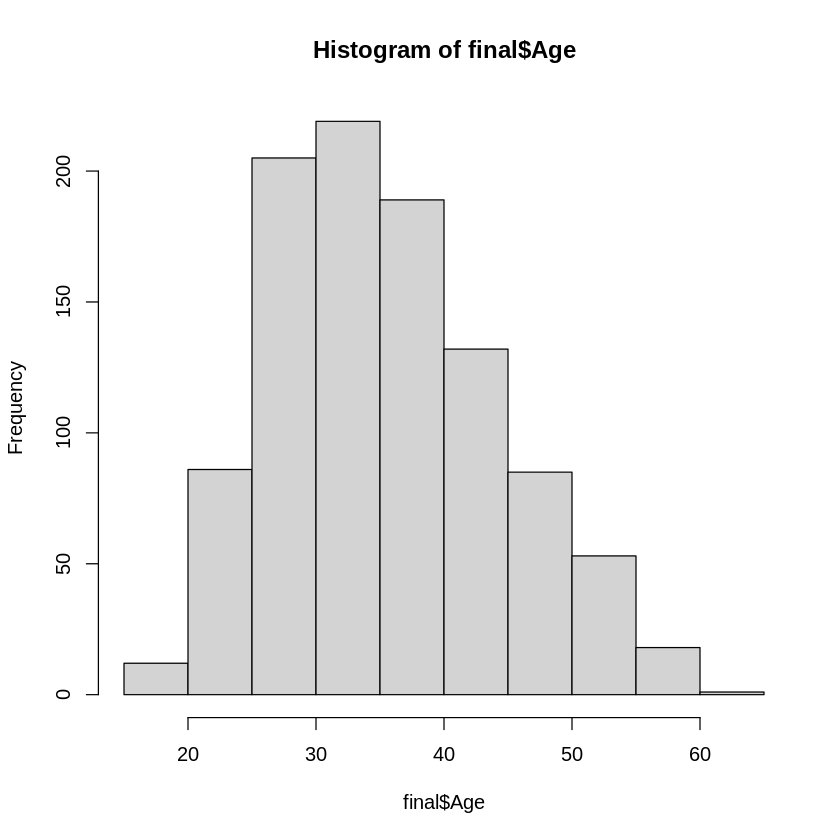

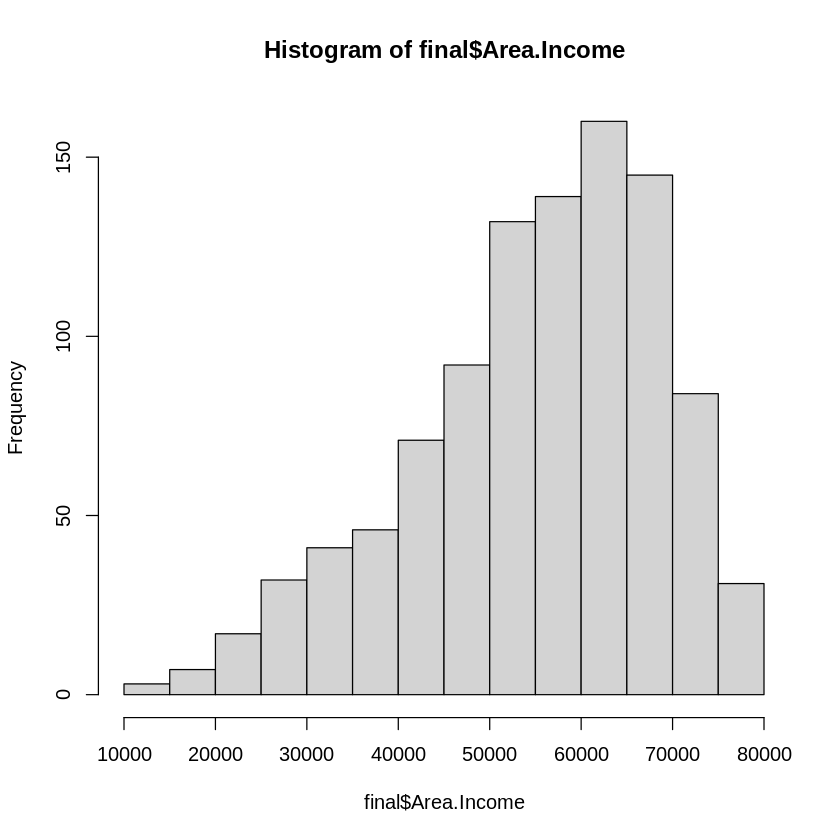

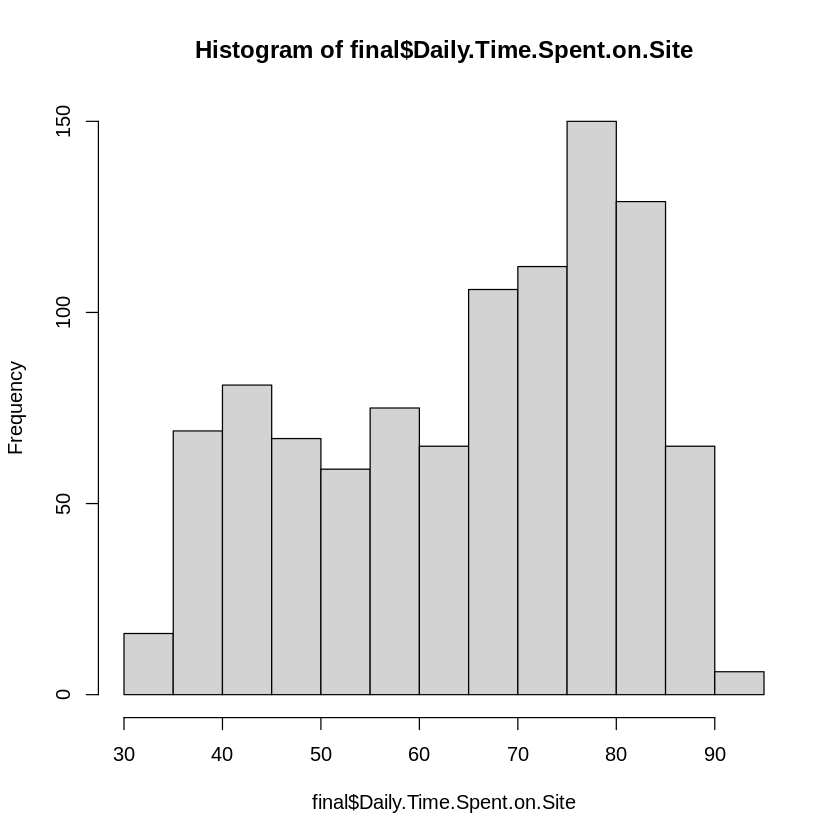

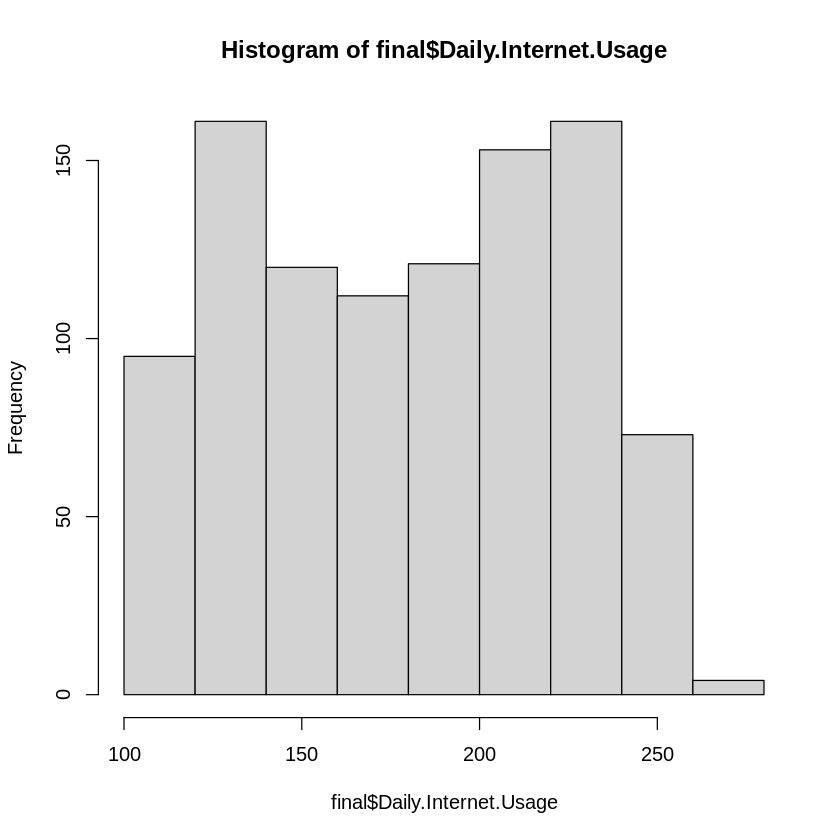

In [117]:
hist(final$Age)
hist(final$Area.Income)
hist(final$Daily.Time.Spent.on.Site)
hist(final$Daily.Internet.Usage)

* Age: Most people who visit the blog are between 25 and 40 years, data is skewed to the right of the mean. Graph doesn't show a sharp peak
* Income: Data on income is mostly skewed to the right of the 55,00 mean
* Time spent on site: There are lots of variations on how much time people spend on the site. A good number does spend between 65 and 85 time on the site.
* Daily Internet Usage: 

**Categorical Data**

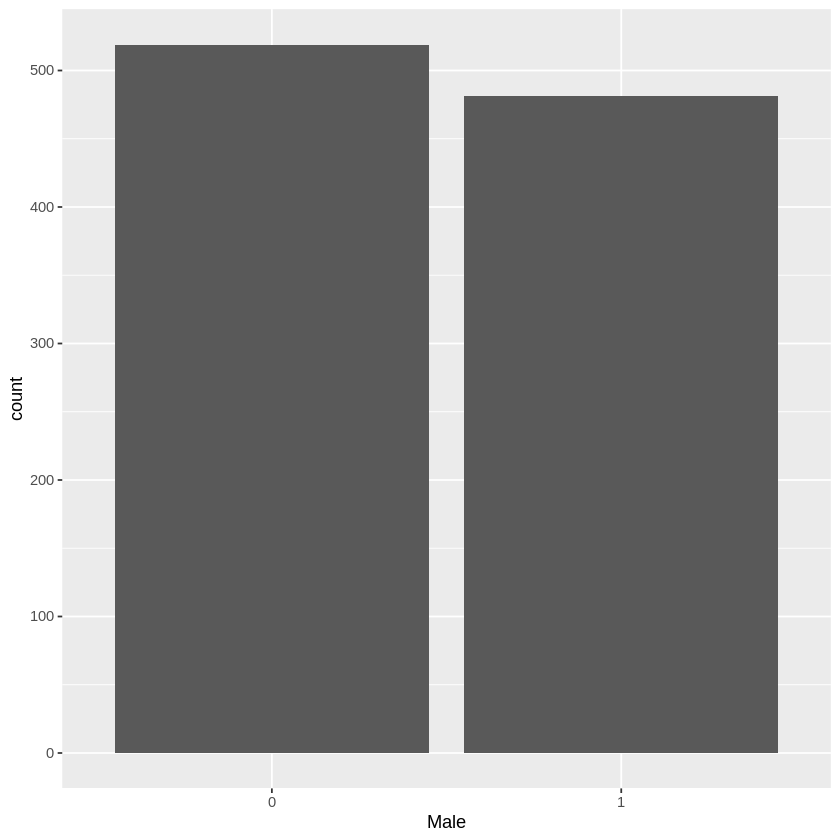

In [99]:
#Which gender is mainly active on the blog?
ggplot(data = final) +
  geom_bar(mapping = aes(x = Male))

#Assuming that if male = 1 then we can conclude that more females
# frequennt the blog more as compared to males


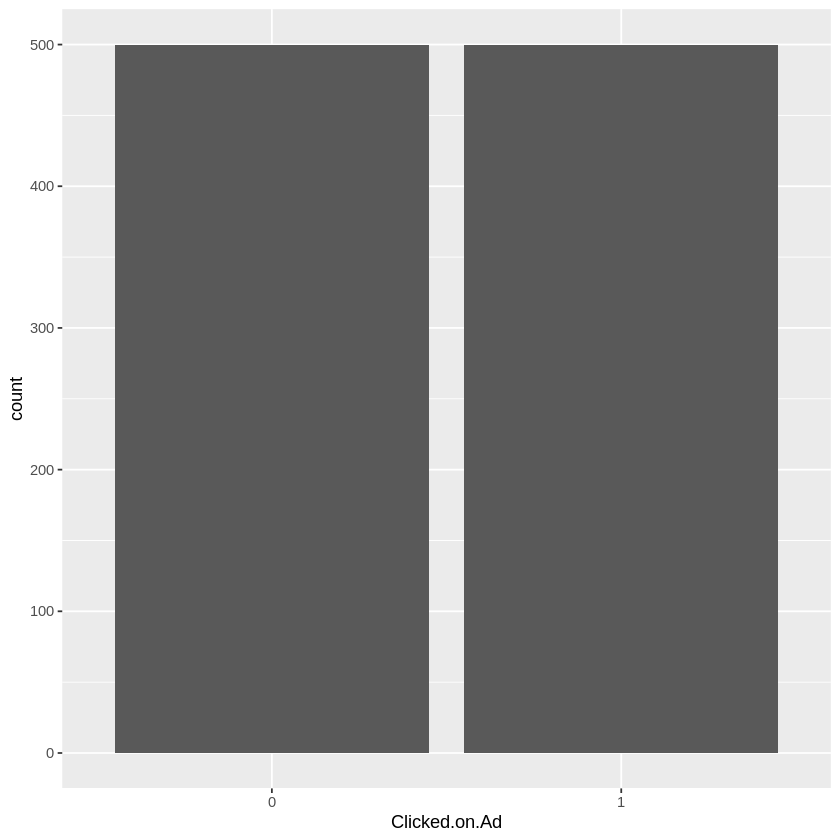

In [119]:
#Do most people clickon ads or not?
ggplot(data = final) +
  geom_bar(mapping = aes(x = Clicked.on.Ad))

#There is a balance between the people who click on ads and those who don't
#We can coclude that half of the people who visit the website willl probably click on an ad

### ii. Bivariate Analysis

**Correlation**

In [ ]:
install.packages("corrplot")

library(corrplot)

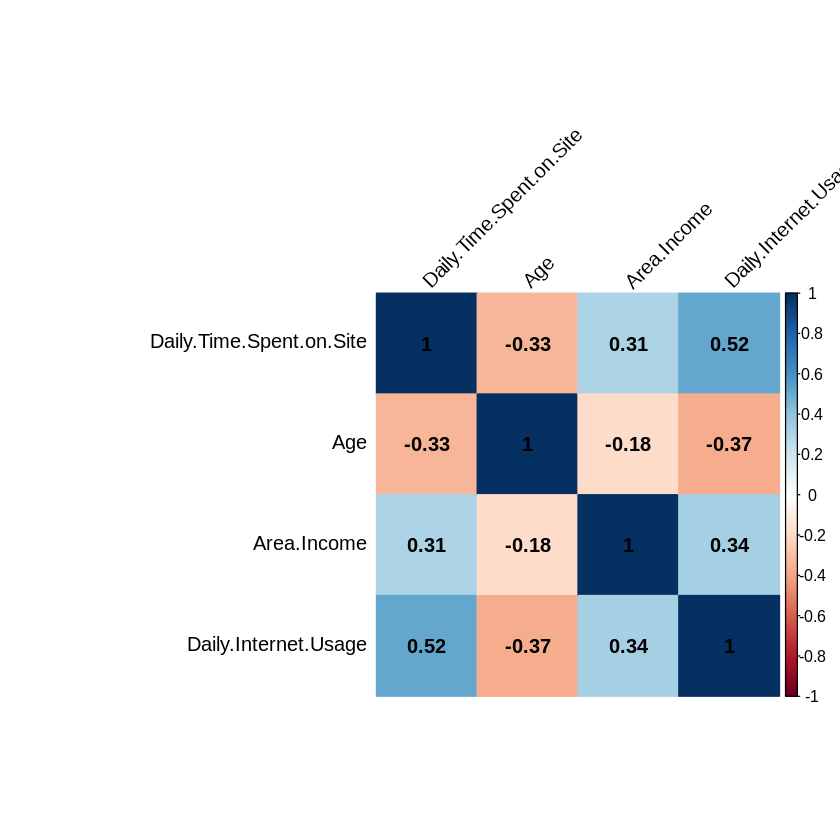

In [125]:
#Get the correlation matrix
res = cor(num)
#Plotting a correlation plot

corrplot(res, method="color",addCoef.col = "black", 
         tl.col="black", tl.srt=45)        

There is a fare correlation between amount spent on site and the Daily internet usage.

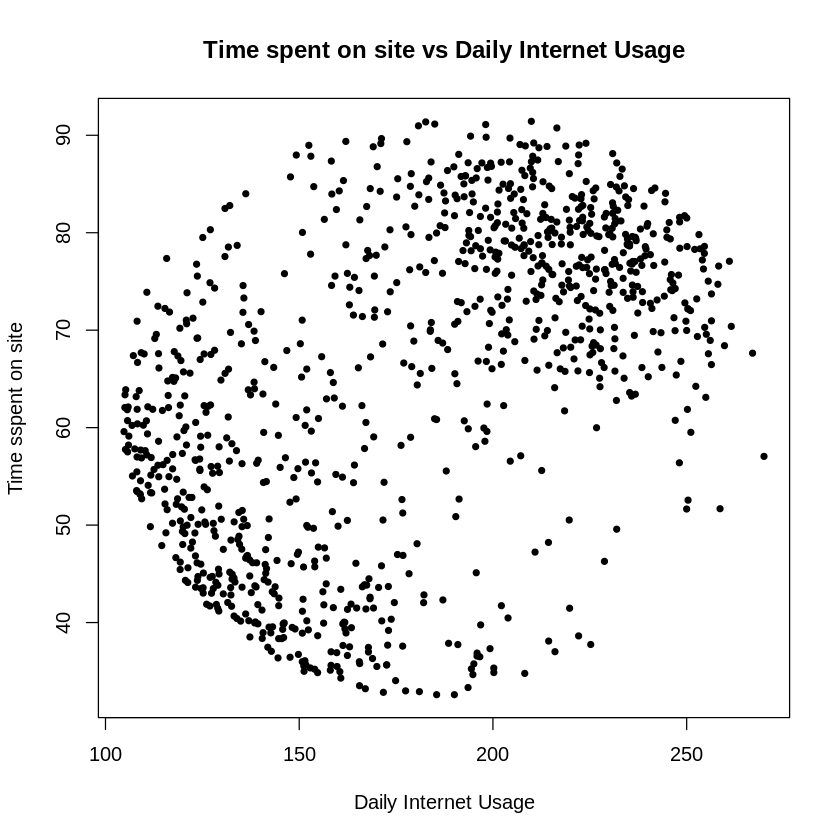

In [133]:
x <- final$Daily.Internet.Usage
y <-  final$Daily.Time.Spent.on.Site
# Plot with main and axis titles
# Change point shape (pch = 19) and remove frame.
plot(x, y, main = "Time spent on site vs Daily Internet Usage",
     xlab = "Daily Internet Usage", ylab = "Time sspent on site",
     pch = 20)

The points are all over but our data points are not highly correlated which explains this. But we can see that people who spend less time on site use less internet. Also, most of the people who use alot of internet per day seem to spend a considerable amount of time on the site.

This is a good sign for the business

### **Explore which individuals are most likely to click on an ad**

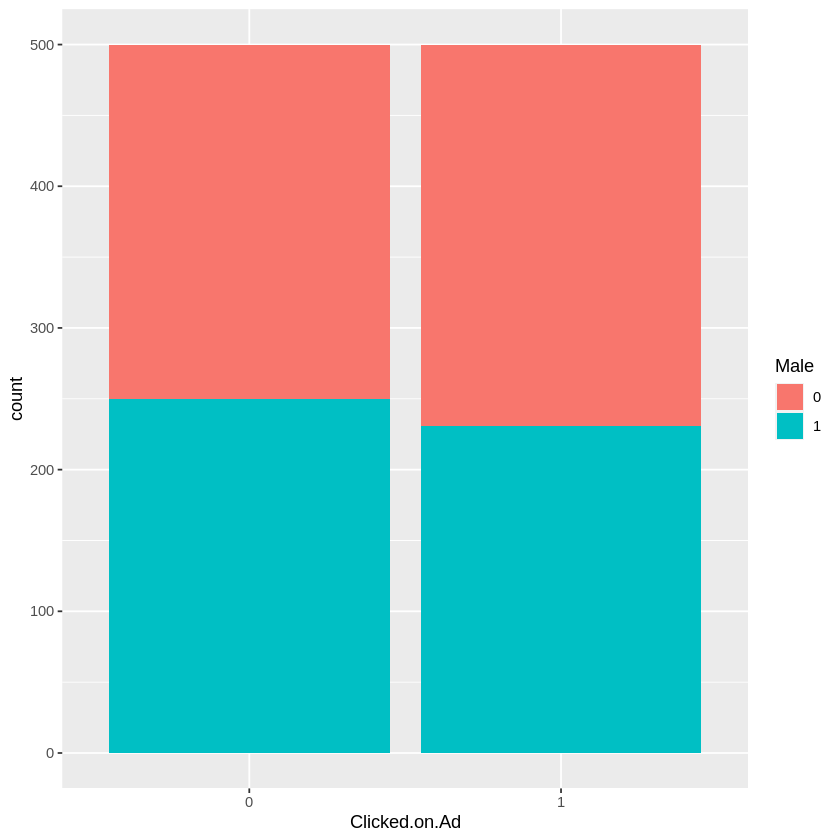

In [137]:
#Who is likely to click on an ad, female or male?
library(ggplot2)

# stacked bar chart
ggplot(final, 
       aes(x = Clicked.on.Ad, 
           fill = Male)) + 
  geom_bar(position = "stack")

From above graph, we can see that female(where male=0), is slightly more likely to click on an ad that male.

But also from earlier analysis, it is important to note that females are slightly more frequent on the blog than male.

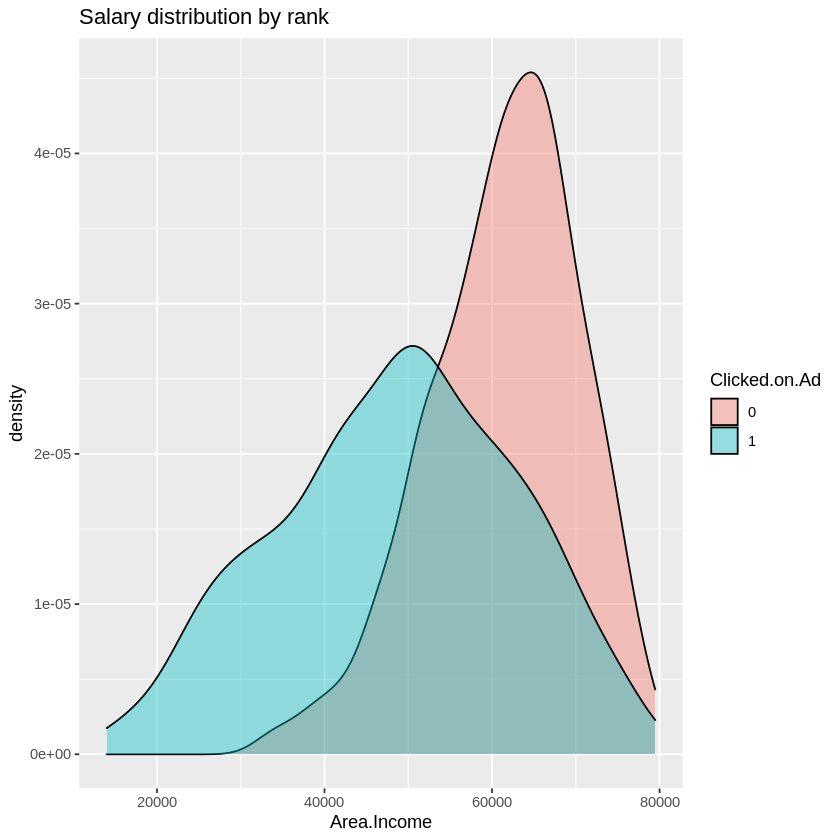

In [138]:
#Income class and it's relationship to clicking an ad
ggplot(final, 
       aes(x = Area.Income, 
           fill = Clicked.on.Ad)) +
  geom_density(alpha = 0.4) +
  labs(title = "Income vs chances of clicking on an ad")

The income range for people who click on an ad is large as compared to those that don't.  People from all ranges of income are likely to click on an ad but most of the group with an income of above 60000 are not likely to click on an ad.

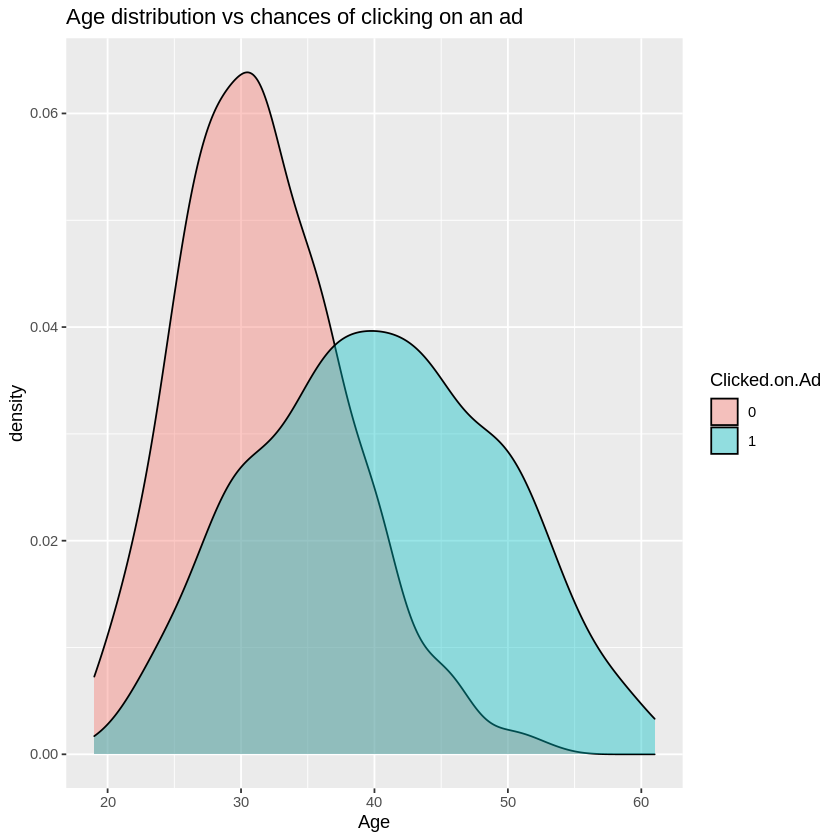

In [141]:
#Age and it's relationship to clicking an ad
ggplot(final, 
       aes(x = Age, 
           fill = Clicked.on.Ad)) +
  geom_density(alpha = 0.4) +
  labs(title = "Age distribution vs chances of clicking on an ad")

People from all age groups click on ads on the site. People above 40 are more likely to click on an ad as per the graph above.

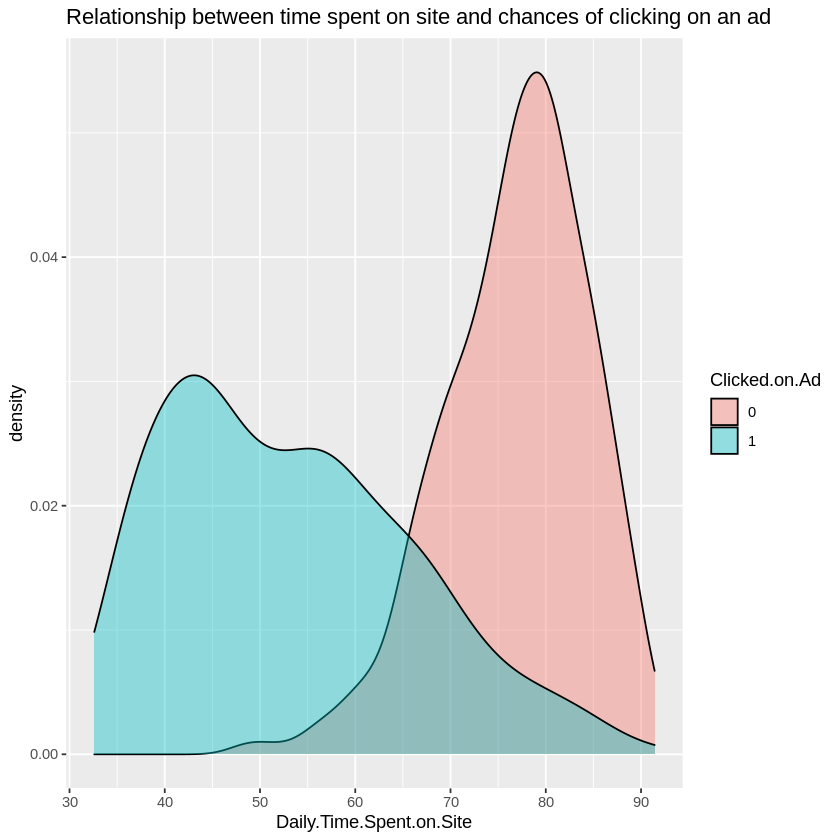

In [142]:
#Age and it's relationship to clicking an ad
ggplot(final, 
       aes(x = Daily.Time.Spent.on.Site, 
           fill = Clicked.on.Ad)) +
  geom_density(alpha = 0.4) +
  labs(title = "Relationship between time spent on site and chances of clicking on an ad")

People who spend less time on the site are likely to click on an ad as compared to those who spend alot of time on the site.

But, all kinds of people including those who spend alot of time on site might click on an ad.

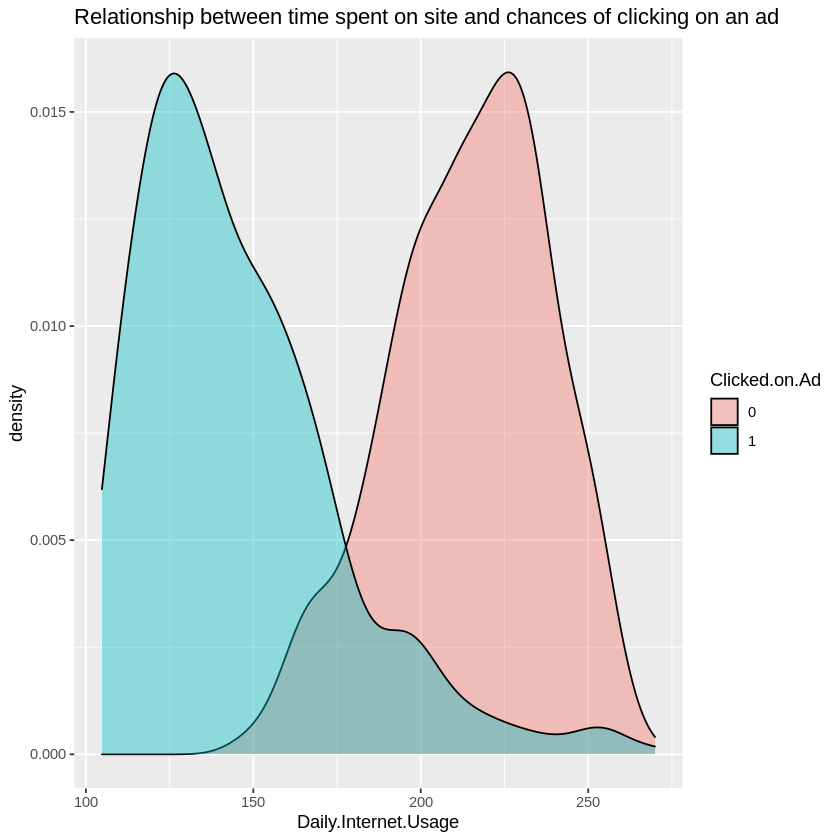

In [143]:
#Internet Usage and it's relationship to clicking an ad
ggplot(final, 
       aes(x = Daily.Internet.Usage, 
           fill = Clicked.on.Ad)) +
  geom_density(alpha = 0.4) +
  labs(title = "Relationship between time spent on site and chances of clicking on an ad")

There is some kind of uniformity between Daily Internet Usage and whether a user will click on an ad or not.
Most people who click on an add do not spend alot od internet per day. And most of those who don't click on anad seem to spend a lot of toime in the site

## 6. Conclusion

1. People who have a daily internet usage of less than 175 are more likely to click on an ad
2. People who spend less than 70mins on the site are likely to click on ad
3. People above 40 are more likely to click on an ad 
4. People with an income of less than 60000 are most likely to click on an ad
5. The female gender is likely to click on ad

## 7. Challenging the solution

* It would be great to do some hypothesis testing on the conclusions made from Exploratory Data Analysis, this way we could ascertain the chances of specific person clicking on an ad or not.
* Also, it would be necessary to create a predictive model and perform some feature importance selection to choose which variables are most important to use when deciding who will click on an ad or not when using the website.